In [1]:
import sys
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.absolute()))
from envelopes import evc, evp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time

### Building envelopes speed test

In [2]:
env_num=100
dt = np.arange(0, 50 * env_num, 50)
amp = np.random.rand(env_num)

In [3]:
t_start = time.time()
loops = 10000
for i in range(loops):
    # g_p = evp.Gaussian(10, 10, 0.1)
    g_p = evp.GaussianDRAG(10, 10, 0.1, 0.0773, 0.5, 0.01)
    # g_p = evp.mix(evp.Gaussian(10, 10, 0.1), 0.0773, 0.01, True)
    s_p = evp.align(g_p, dt, amp)
t_end = time.time()
build_time_py = (t_end - t_start) / loops * 1000
print("Python time taken per loop:", build_time_py, "ms")

Python time taken per loop: 0.1064725637435913 ms


In [4]:
t_start = time.time()
loops = 10000
for i in range(loops):
    # g_c = evc.Gaussian(10, 10, 0.1)
    g_c = evc.GaussianDRAG(10, 10, 0.1, 0.0773, 0.5, 0.01)
    # g_p = evc.mix(evc.Gaussian(10, 10, 0.1), 0.0773, 0.01, True)
    s_c = evc.align(g_c, dt, amp)
t_end = time.time()
build_time_cpp = (t_end - t_start) / loops * 1000
print("C++ time taken per loop:", build_time_cpp, "ms")

C++ time taken per loop: 0.024922800064086915 ms


### Decode envelopes speed test

In [5]:
resolution = 0.5
wc_p = evp.WaveCache(resolution)
# wc_p = evp.WaveCache(resolution, precision='double')
wc_c = evc.WaveCache(resolution)

In [6]:
t_start = time.time()
loops = 100
for i in range(loops):
    t_p, wave_p = evp.decode_envelope(s_p, wc_p)
    # t_p, wave_p = evp.decode_envelope(s_p, wc_p, start=-20000, end=100000)
    # wave_p.tobytes()
t_end = time.time()
decode_time_py = (t_end - t_start) / loops * 1000
print("Python time taken per loop:", decode_time_py, "ms")

Python time taken per loop: 1.5799808502197266 ms


In [7]:
len(wave_p)

10022

In [8]:
t_start = time.time()
loops = 1000
for i in range(loops):
    t_c, wave_c = evc.decode_envelope(s_c, wc_c)
    # t_c, wave_c = evc.decode_envelope(s_c, wc_c, start=-20000, end=100000)
    wave_c = np.array(wave_c, copy=False)
    # wave_c.tobytes()
t_end = time.time()
decode_time_cpp = (t_end - t_start) / loops * 1000
print("C++ time taken per loop:", decode_time_cpp, "ms")

C++ time taken per loop: 0.07099795341491699 ms


In [9]:
len(wave_c)

10022

### Serialization speed test

In [10]:
t_start = time.time()
loops = 100
for i in range(loops):
    ss_p = pickle.dumps(s_p)
t_end = time.time()
serialization_time_py = (t_end - t_start) / loops * 1000
print("Python time taken per loop:", serialization_time_py, "ms")

Python time taken per loop: 0.7200384140014648 ms


In [11]:
t_start = time.time()
loops = 1000
for i in range(loops):
    ss_c = pickle.dumps(s_c)
t_end = time.time()
serialization_time_cpp = (t_end - t_start) / loops * 1000
print("C++ time taken per loop:", serialization_time_cpp, "ms")

C++ time taken per loop: 0.051996469497680664 ms


### Deserialization speed test

In [12]:
t_start = time.time()
loops = 100
for i in range(loops):
    pickle.loads(ss_p)
t_end = time.time()
deserialization_time_py = (t_end - t_start) / loops * 1000
print("Python time taken per loop:", deserialization_time_py, "ms")

Python time taken per loop: 0.1799774169921875 ms


In [13]:
t_start = time.time()
loops = 1000
for i in range(loops):
    pickle.loads(ss_c)
t_end = time.time()
deserialization_time_cpp = (t_end - t_start) / loops * 1000
print("C++ time taken per loop:", deserialization_time_cpp, "ms")

C++ time taken per loop: 0.02300095558166504 ms


### Visualizing the speed

([<matplotlib.axis.XTick at 0x2957410f040>,
 [Text(0.25, 0, 'Build'),
  Text(2.25, 0, 'Decode'),
  Text(4.25, 0, 'Serialization'),
  Text(6.25, 0, 'Deserialization')])

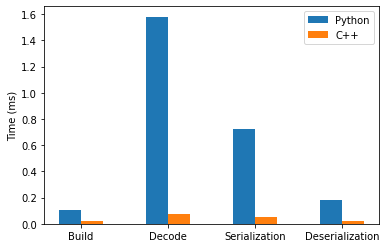

In [14]:
x = np.array([0, 2, 4, 6])
plt.bar(x, [build_time_py, decode_time_py, serialization_time_py, deserialization_time_py], label='Python', width=0.5)
plt.bar(x + 0.5, [build_time_cpp, decode_time_cpp, serialization_time_cpp, deserialization_time_cpp], label='C++', width=0.5)
# plt.bar(x + 0.5, [build_time_cpp*10, decode_time_cpp*10, serialization_time_cpp*10, deserialization_time_cpp*10], label='C++('+r'$\times$'+'10)', width=0.5)
plt.legend()
plt.ylabel('Time (ms)')
plt.xticks(x + 0.25, ['Build', 'Decode', 'Serialization', 'Deserialization'])